In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from collections import deque
from time import time


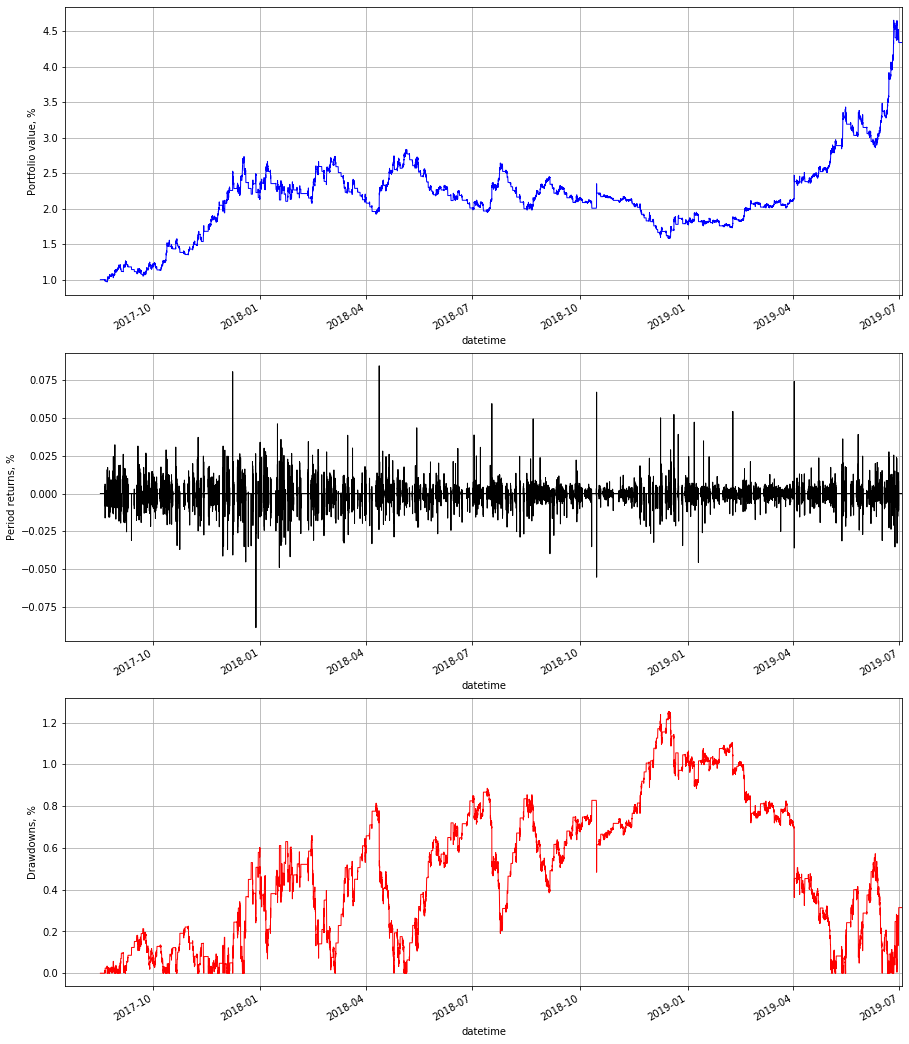

In [37]:
data = pd.read_csv('equity.csv', header=0, parse_dates=True, index_col=0)
data = data.sort_index()

fig = plt.figure(figsize=[15, 20])
fig.patch.set_facecolor('white')

ax1 = fig.add_subplot(311, ylabel='Portfolio value, %')
data['equity_curve'].plot(ax=ax1, color="blue", lw=1.)
plt.grid(True)

ax2 = fig.add_subplot(312, ylabel='Period returns, %')
data['returns'].plot(ax=ax2, color="black", lw=1.)
plt.grid(True)

ax3 = fig.add_subplot(313, ylabel='Drawdowns, %')
data['drawdown'].plot(ax=ax3, color="red", lw=1.)
plt.grid(True)

plt.show()

In [11]:
trades = [{'id': 1, 'open': 1, 'close': 3}, {'id': 2, 'open': 2, 'close': 5}]

In [19]:
trade = [trade for trade in trades if trade['id'] == 1][0]

In [21]:
trade['open'] = 5

In [22]:
trades

[{'id': 1, 'open': 5, 'close': 3}, {'id': 2, 'open': 2, 'close': 5}]

In [39]:
class Trade:

    trades = list()

    def __init__(self, symbol, open_date, open_price, open_fees):
        self.symbol = symbol
        self.is_open = True

        self.open_price = open_price
        self.open_date = open_date
        self.open_fees = open_fees

        self.close_price = None
        self.close_date = None
        self.close_fees = None

        self.trades.append(self)

    @classmethod
    def close(self, open_date, close_date, close_price, close_fees):
        trade = [trade for trade in self.trades if trade.open_date
                 == open_date and trade.is_open][0]
        trade.is_open = False
        trade.close_price = close_price
        trade.close_date = close_date
        trade.close_fees = close_fees

    @classmethod
    def to_dict(self):
        trades = list()
        for trade in Trade.trades:
           trades.append(
            {
                'symbol': trade.symbol,
                'open_price': trade.open_price,
                'open_date': trade.open_date,
                'close_price': trade.close_price,
                'close_date': trade.close_date
            }
           ) 
        return trades

In [40]:
Trade('BTC-USDT', 1, 2, 12)
Trade('BTC-USDT', 2, 4, 120)

In [42]:
Trade.to_dict()

[{'symbol': 'BTC-USDT',
  'open_price': 2,
  'open_date': 1,
  'close_price': None,
  'close_date': None},
 {'symbol': 'BTC-USDT',
  'open_price': 4,
  'open_date': 2,
  'close_price': None,
  'close_date': None}]

In [43]:
Trade.trades

[<__main__.Trade at 0x10a6c0c18>, <__main__.Trade at 0x10a6c0c50>]